## Binary Classification: Titanic Dataset
https://www.kaggle.com/c/titanic

** Dataset Information: **

891 passenger information aboard the Titanic

** Attribute Information: (9 features and 1 class)**


Variable	Definition	     Key
1. survival	Survival	     0 = No, 1 = Yes
2. pclass	Ticket class	 1 = 1st, 2 = 2nd, 3 = 3rd
3. sex	    Sex	
4. Age	    Age in years	
5. sibsp	# of siblings / spouses aboard the Titanic	
6. parch	# of parents / children aboard the Titanic	
7. ticket	Ticket number	
8. fare	    Passenger fare	
9. cabin	Cabin number	
10. embarked Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

** Objective of this project **

predict whether a passenger survived the sinking of the Titanic or not

## Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
# Load Data
df = pd.read_csv('train.csv')

In [3]:
# Inspect Data
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [24]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [25]:
df.shape

(891, 12)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [76]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


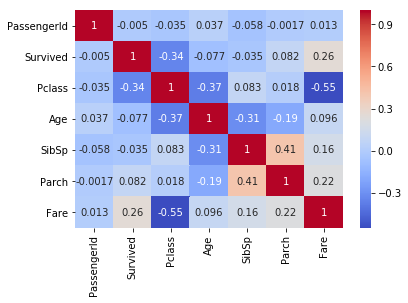

In [19]:
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

## Data preprocessing

** Missing Data **

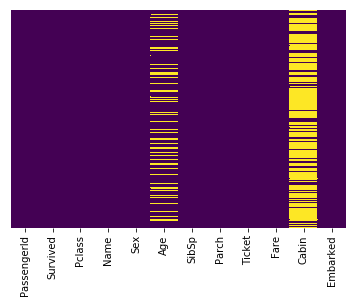

In [26]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

** Clean Data **

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


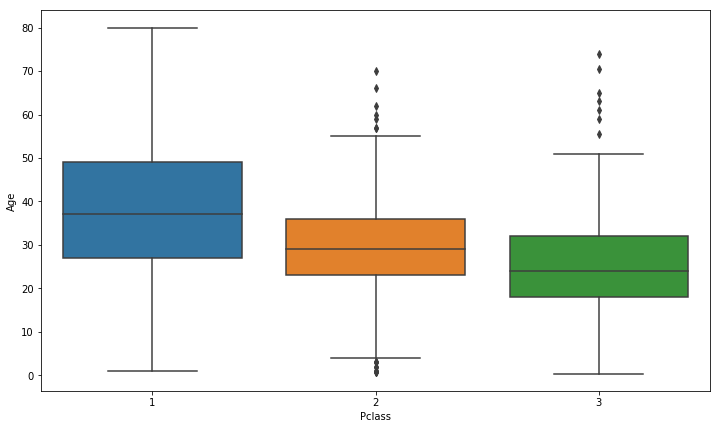

In [4]:
# Passenger: imputed with the average age by Pclass
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df)

df.groupby(by='Pclass').mean()

In [5]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [6]:
# Cabin: drop column
df.drop('Cabin',axis=1,inplace=True)
# Embark: dropna
df.dropna(inplace=True)
# Name, Ticket : drop column
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [8]:
df['Survived'].value_counts() #imbalanced classes-->stratify

0    549
1    340
Name: Survived, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
Survived    889 non-null int64
Pclass      889 non-null int64
Sex         889 non-null object
Age         889 non-null float64
SibSp       889 non-null int64
Parch       889 non-null int64
Fare        889 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


** Encode categorical features to dummy variables **

In [10]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


** Split Features & Class (or target) **

In [11]:
X = df.drop('Survived',axis=1).values
y = df['Survived'].values
print(X.shape,y.shape)

(889, 8) (889,)


** Split Train Test Sets **

In [12]:
seed = 101 #random seed for reproducibility
np.random.seed(seed)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y,random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(711, 8) (178, 8) (711,) (178,)


In [14]:
np.unique(y_train,return_counts=True) #similar ratio to original class

(array([0, 1], dtype=int64), array([439, 272], dtype=int64))

** Scale features **

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Baseline Models

In [16]:
# Import libraries
from sklearn.model_selection import StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [39]:
models = []
#linear
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
#non-linear
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
#ensemble
models.append(('RF', RandomForestClassifier(n_estimators=100,random_state=seed)))
models.append(('XGB', XGBClassifier(random_state=seed)))

Accuracy: mean +/- std
LR: 79.7% +/- 4.9%
LDA: 79.3% +/- 5.3%
KNN: 80.0% +/- 4.3%
NB: 76.4% +/- 5.1%
DT: 76.6% +/- 3.5%
SVM: 81.3% +/- 4.0%
RF: 80.6% +/- 3.5%
XGB: 82.0% +/- 4.4%


Text(0,0.5,'Accuracy')

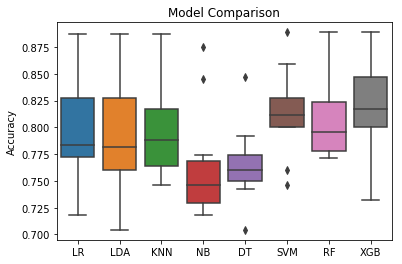

In [40]:
# cross validation
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
names = []
results = []
print('Accuracy: mean +/- std')
for name,model in models:
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)    
    print('{}: {:0.1f}% +/- {:0.1f}%'.format(name, cv_results.mean()*100, 
                                             cv_results.std()*100))
# visualize results
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.title('Model Comparison')
plt.ylabel('Accuracy')

## Parameter Tuning
try to improve 4 top algorithms: XGB,SVM,RF,KNN

#### Model 1: XGBoost

In [41]:
# Default
model = XGBClassifier(n_estimators=100,random_state=seed)
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 'objective': 'binary:logistic', 'random_state': 101, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1}


Accuracy of test set: 84.8%


In [55]:
# Grid Search
model = XGBClassifier(random_state=seed)

# parameters
n_estimators = [10, 20, 50]#,100,200]
max_depth = [3,4,5]
learning_rate = [0.5,0.3,0.1,0.01]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, 
                  learning_rate=learning_rate)
param_grid

# grid search
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 36 candidates, totalling 360 fits
0.810127 (0.049990) with: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 10}
0.818565 (0.053055) with: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 20}
0.815752 (0.047905) with: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 50}
0.807314 (0.048989) with: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 10}
0.808720 (0.045203) with: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 20}
0.815752 (0.041644) with: {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 50}
0.815752 (0.049104) with: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 10}
0.817159 (0.044336) with: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 20}
0.811533 (0.038989) with: {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 50}
0.815752 (0.049290) with: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 10}
0.814346 (0.044591) with: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 20}
0.

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    6.2s finished


#### Model 2: Support Vector Machine

In [110]:
# Default
model = SVC(kernel='rbf')
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Accuracy of test set: 84.8%


In [111]:
# Grid Search
model = SVC(kernel='rbf')

# parameters
C = [100.0, 10.0, 1.0, 0.1]
gamma = [1.0, 0.1, 0.05, 0.01,0.001]
param_grid = dict(gamma=gamma, C=C)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.781997 (0.037578) with: {'C': 100.0, 'gamma': 1.0}
0.786217 (0.046368) with: {'C': 100.0, 'gamma': 0.1}
0.786217 (0.049213) with: {'C': 100.0, 'gamma': 0.05}
0.818565 (0.041467) with: {'C': 100.0, 'gamma': 0.01}
0.787623 (0.049637) with: {'C': 100.0, 'gamma': 0.001}
0.796062 (0.041189) with: {'C': 10.0, 'gamma': 1.0}
0.807314 (0.040775) with: {'C': 10.0, 'gamma': 0.1}
0.815752 (0.046221) with: {'C': 10.0, 'gamma': 0.05}
0.796062 (0.048434) with: {'C': 10.0, 'gamma': 0.01}
0.783404 (0.049287) with: {'C': 10.0, 'gamma': 0.001}
0.791842 (0.045749) with: {'C': 1.0, 'gamma': 1.0}
0.815752 (0.040427) with: {'C': 1.0, 'gamma': 0.1}
0.810127 (0.041235) with: {'C': 1.0, 'gamma': 0.05}
0.787623 (0.049637) with: {'C': 1.0, 'gamma': 0.01}
0.777778 (0.029968) with: {'C': 1.0, 'gamma': 0.001}
0.707454 (0.047898) with: {'C': 0.1, 'gamma': 1.0}
0.801688 (0.047665) with: {'C': 0.1, 'gamma': 0.1}
0.797468 (0.048454) with: {'C': 0.1, 'gamma

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.4s finished


#### Model 3: RandomForest

In [112]:
# Default
model = RandomForestClassifier(n_estimators=100,random_state=seed)
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 101, 'verbose': 0, 'warm_start': False}


Accuracy of test set: 80.9%


In [116]:
# Grid Search
model = RandomForestClassifier(random_state=seed)

# parameters
n_estimators = [50, 100, 200]
max_depth = [9,10,11]
#criterion = ['gini','entropy']
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)#, criterion=criterion)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.822785 (0.031708) with: {'max_depth': 9, 'n_estimators': 50}
0.829817 (0.039835) with: {'max_depth': 9, 'n_estimators': 100}
0.824191 (0.046497) with: {'max_depth': 9, 'n_estimators': 200}
0.831224 (0.046082) with: {'max_depth': 10, 'n_estimators': 50}
0.835443 (0.039039) with: {'max_depth': 10, 'n_estimators': 100}
0.821378 (0.043599) with: {'max_depth': 10, 'n_estimators': 200}
0.827004 (0.038791) with: {'max_depth': 11, 'n_estimators': 50}
0.835443 (0.037212) with: {'max_depth': 11, 'n_estimators': 100}
0.828411 (0.031973) with: {'max_depth': 11, 'n_estimators': 200}


Best accuracy of training set: 83.5% using {'max_depth': 10, 'n_estimators': 100}
Accuracy of test set: 84.3%


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   14.7s finished


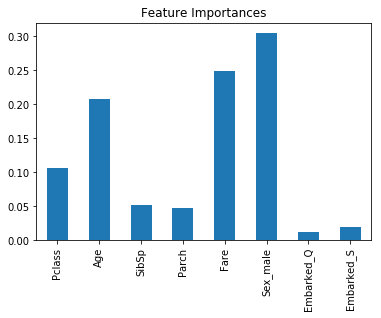

In [40]:
# Feature Importance
model = RandomForestClassifier(max_depth=10,n_estimators=100,random_state=seed)
model.fit(X_train, y_train)
pd.DataFrame(data=model.feature_importances_,
             index=df.drop('Survived',axis=1).columns).plot(kind='bar',legend=False,
                                                        title='Feature Importances')

#### Model 4: K-Nearest Neighbors

In [119]:
# Default
model = KNeighborsClassifier()
model.fit(X_train,y_train)
print(model.get_params())
print('\n')
print('Accuracy of test set: {:0.1f}%'.format(model.score(X_test,y_test)*100))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


Accuracy of test set: 82.0%


In [120]:
# Grid Search
model = KNeighborsClassifier()

# parameters
n_neighbors = [4,5,6,7,8]
param_grid = dict(n_neighbors=n_neighbors)
param_grid

# grid search
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, random_state=seed)
grid_search = GridSearchCV(model, param_grid=param_grid, 
                          cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train,y_train)

# results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# best
print('\n')
print("Best accuracy of training set: %.1f%% using %s" % (grid_result.best_score_*100, grid_result.best_params_))
# test set
print('Accuracy of test set: {:0.1f}%'.format(grid_result.score(X_test,y_test)*100))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
0.786217 (0.048119) with: {'n_neighbors': 4}
0.800281 (0.043412) with: {'n_neighbors': 5}
0.790436 (0.050374) with: {'n_neighbors': 6}
0.803094 (0.037223) with: {'n_neighbors': 7}
0.796062 (0.040003) with: {'n_neighbors': 8}


Best accuracy of training set: 80.3% using {'n_neighbors': 7}
Accuracy of test set: 83.1%


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


## Final Model: XGBoost 

** Params: learning_rate=0.3, max_depth=3, n_estimators=50 **

In [57]:
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report,accuracy_score
from xgboost import plot_importance, to_graphviz  

model = XGBClassifier(learning_rate=0.3, max_depth=3, n_estimators=50, 
                      random_state=seed)
X_train = pd.DataFrame(data=X_train, columns=df.drop('Survived',axis=1).columns)
X_test = pd.DataFrame(data=X_test, columns=df.drop('Survived',axis=1).columns)
model.fit(X_train, y_train)
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 89.0%


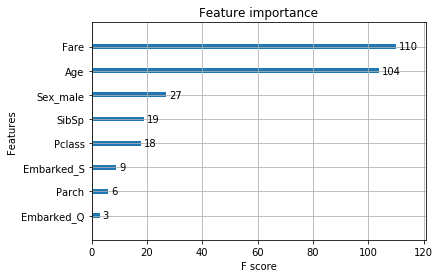

In [60]:
# Feature importance
plot_importance(model)
plt.show()

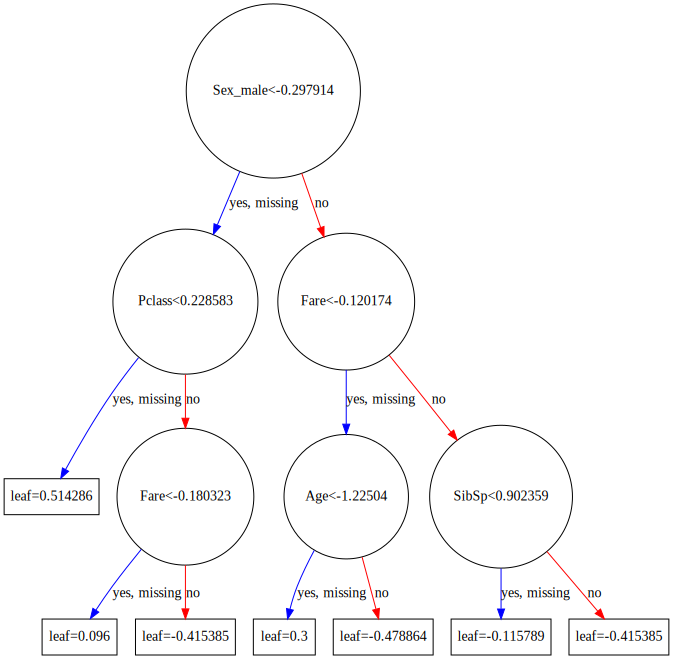

In [61]:
# plot tree
xgb.to_graphviz(model)

** Save and load the final model **

In [62]:
#save model to disk
import pickle
filename='model.sav'
pickle.dump(model, open(filename, 'wb'))

In [63]:
#load the model from disk
model = pickle.load(open(filename,'rb'))
accuracy = model.score(X_train, y_train)
print('Accuracy of training set: {:0.1f}%'.format(accuracy*100))

Accuracy of training set: 89.0%


** Classification report & Confusion Matrix **

             precision    recall  f1-score   support

          0       0.89      0.93      0.91       439
          1       0.88      0.82      0.85       272

avg / total       0.89      0.89      0.89       711



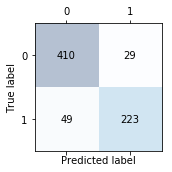

In [64]:
#classification report
print(classification_report(y_train, model.predict(X_train)))

#confusion matrix
confmat = confusion_matrix(y_train, model.predict(X_train))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Model Evaluation with Test set

Accuracy of test set: 84.8%
roc_auc of test set: 0.827

             precision    recall  f1-score   support

          0       0.85      0.92      0.88       110
          1       0.85      0.74      0.79        68

avg / total       0.85      0.85      0.85       178



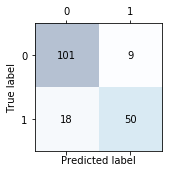

In [67]:
# predict class with test set (new, unseen)
y_pred = model.predict(X_test)
print('Accuracy of test set: {:0.1f}%'.format(accuracy_score(y_test,y_pred)*100))
print('roc_auc of test set: {:0.3f}'.format(roc_auc_score(y_test,y_pred)))
print()

#classification report
print(classification_report(y_test, model.predict(X_test)))

#confusion matrix
confmat = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

## Summary

Best model: ** XGBoost ** w/param: learning_rate=0.3, max_depth=3, n_estimators=50

Accuracy of test set: ** 84.8% **